In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function
import time
import threading
import os
from astropy.io import fits 
import numpy as np
from PIL import Image, ImageDraw
from JoinFilter import JoinFilter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
dir_ = './black_frames/'
paths = [dir_ + f for f in os.listdir(dir_) if f.upper()[-3:] == 'FIT']

In [64]:
def partiotions(list_, slotsize=2):
    slots = []
    while True:
        if len(list_) < slotsize:
            break
        slots.append(list_[:slotsize])
        list_ = list_[slotsize:]
    return slots

In [65]:
def simple_experiment(group):
    f = JoinFilter(group)
    f.process()
    return f.less_indices().size + f.more_indices().size

In [66]:
def experiment(list_, slotsize):
    if slotsize >= len(list_):
        return
    results = []
    groups = partiotions(list_, slotsize)
    main = groups[0]
    groups = groups[1:]
    for g in groups:
        group = main + g
        results.append(simple_experiment(group))
    return results

In [92]:
slotsize = 5
x = np.arange(len(partiotions(paths, slotsize)) - 1) + 1
y = experiment(paths, slotsize)

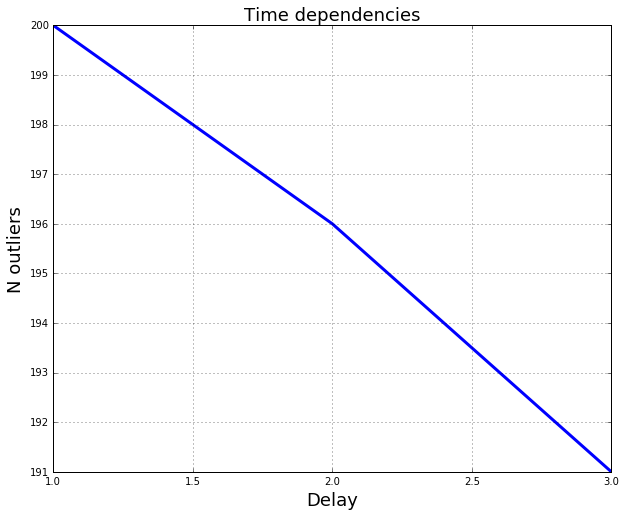

In [102]:
plt.figure(figsize=(10,8))
plt.title('Time dependencies', fontsize=18)
plt.xlabel('Delay', fontsize=18)
plt.ylabel('N outliers', fontsize=18)
plt.plot(x, y, lw=3)
plt.grid()
plt.savefig('Benchmarks/N_t.png')
plt.show()